In [1]:
import matplotlib.pyplot as plt
import random
import math

In [2]:
def fobj(x, A, k):
    return A * math.sin(k * x)

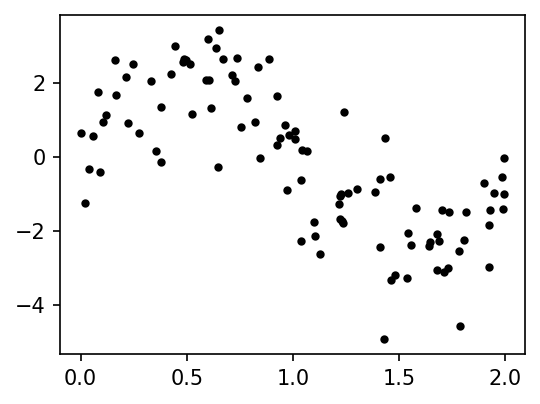

In [27]:
A = 2
k = 3
N = 100
s = 1 # noisy
xr = [0, 2]

# create data
x_data = sorted([random.uniform(xr[0], xr[1]) for i in range(N)])
y_data = [fobj(x, A, k) + random.gauss(0, s) for x in x_data]

# show data
plt.figure(dpi=150, figsize=(4, 3))
plt.plot(x_data, y_data, 'k.')
plt.show()

In [28]:
# set initial point
est_A = 2
est_k = 4
w = 0.001
numTrials = 100
path_err_A = []
path_err_k = []
path_mse = []

for i in range(numTrials):
    mse = 0 # mean square error
    err_A = 0
    err_k = 0
    for x, y in zip(x_data, y_data):
        dy = y - fobj(x, est_A, est_k)
        mse += dy**2
        err_A += -2*dy*math.sin(est_k*x)
        err_k += -2*dy*est_A*x*math.cos(est_k*x)
    est_A -= w*err_A
    est_k -= w*err_k
    # save path
    path_err_A.append(err_A)
    path_err_k.append(err_k)
    path_mse.append(mse)

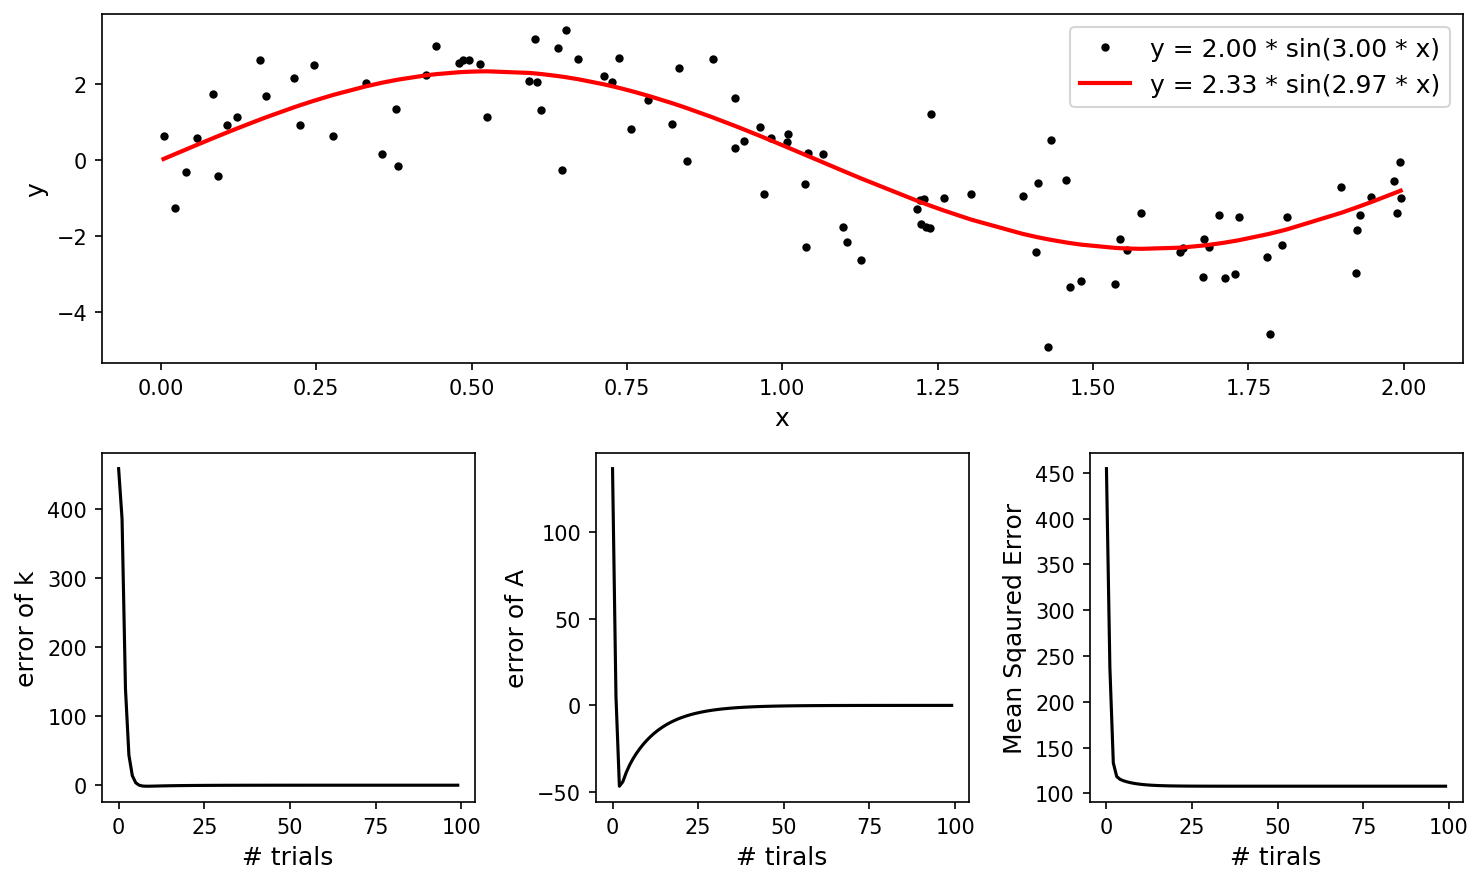

In [29]:
# show result
y_est = [fobj(x, est_A, est_k) for x in x_data]

plt.figure(dpi=150, figsize=(10, 6))
plt.subplot(211)
plt.plot(x_data, y_data, 'k.', label='y = %.2f * sin(%.2f * x)'%(A, k))
plt.plot(x_data, y_est, 'r', lw=2, label='y = %.2f * sin(%.2f * x)'%(est_A, est_k))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=12)

plt.subplot(234)
ws = [i for i in range(numTrials)]
plt.plot(ws, path_err_k, 'k')
plt.xlabel('# trials', fontsize=12)
plt.ylabel('error of k', fontsize=12)

plt.subplot(235)
plt.plot(ws, path_err_A, 'k')
plt.xlabel('# tirals', fontsize=12)
plt.ylabel('error of A', fontsize=12)

plt.subplot(236)
plt.plot(ws, path_mse, 'k')
plt.xlabel('# tirals', fontsize=12)
plt.ylabel('Mean Sqaured Error', fontsize=12)

plt.tight_layout()
plt.show()

In [23]:
from tqdm import tqdm_notebook
from mpl_toolkits.mplot3d import Axes3D
from numpy import meshgrid, array

def findObj(x_data, y_data, initA, initk, numTrials=1000, w=0.001):

    est_A = initA
    est_k = initk

    for i in range(numTrials):
        mse = 0 # mean square error
        err_A = 0
        err_k = 0
        for x, y in zip(x_data, y_data):
            dy = y - fobj(x, est_A, est_k)
            mse += dy**2
            err_A += -2*dy*math.sin(est_k*x)
            err_k += -2*dy*est_A*x*math.cos(est_k*x)
        est_A -= w*err_A
        est_k -= w*err_k
    
    return est_A, est_k, mse

def reshape(arr, nrow, ncol):
    # flat -> nrow
    arr2 = []
    for n in range(len(arr)):
        i = n // ncol
        j = n % ncol
        if j == 0:
            arr2.append([])
        
        arr2[i].append(arr[n])
    return arr2

In [9]:
# MSE potential
Ar, nA = [-10, 10], 50
kr, nk = [-10, 10], 50

initAs = [i/nA*(Ar[1]-Ar[0])+Ar[0] for i in range(nA)]
initks = [i/nk*(kr[1]-kr[0])+kr[0] for i in range(nk)]

# find objs
chi2s = []
est_As = []
est_ks = []
for n in tqdm_notebook(range(nA * nk)):
    i = n // nk
    j = n % nk

    a,k,mse = findObj(x_data, y_data, initAs[i], initks[j], numTrials=1000, w=0.001)

    chi2s.append(mse/s**2/N)
    est_As.append(est_As)
    est_ks.append(est_ks)

chi2s = reshape(chi2s, nA, nk)
est_As = reshape(est_As, nA, nk)
est_ks = reshape(est_ks, nA, nk)

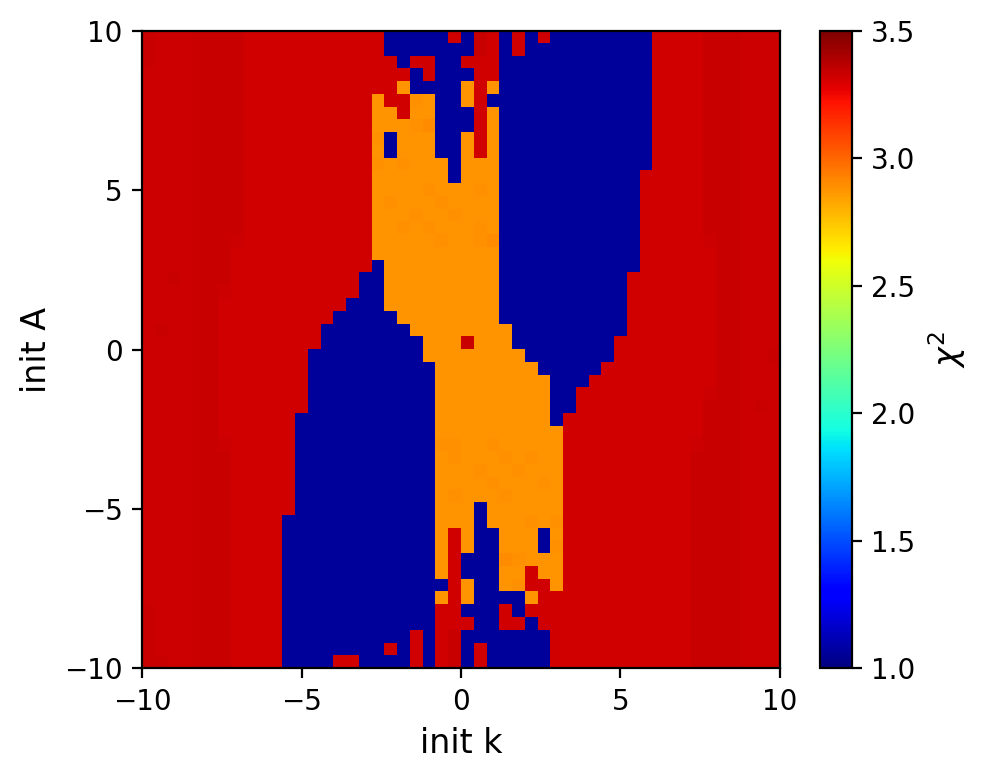

In [39]:
plt.figure(dpi=200, figsize=(5, 4))

plt.imshow(chi2s, cmap='jet', extent=(kr[0], kr[1], Ar[0], Ar[1]), vmin=1, vmax=3.5, origin='lower')
cbar = plt.colorbar()
cbar.set_label(r'$\chi^{2}$', fontsize=12)
plt.xlabel('init k', fontsize=12)
plt.ylabel('init A', fontsize=12)
plt.xticks([-10, -5, 0, 5, 10])
plt.yticks([-10, -5, 0, 5, 10])

plt.tight_layout()
plt.show()